In [8]:
import pandas as pd
import json

In [9]:
review_path = './yelp_dataset/yelp_academic_dataset_review.json'
data_file = open(review_path)
data = []
count = 0
for line in data_file:
    data.append(json.loads(line))
    count = count + 1
    if count == 10000:
        break
    
review_df = pd.DataFrame(data)
data_file.close()

In [18]:
review_df.head(6)
#print(review_df.shape[0])

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4.0,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4.0,1,0,0,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5.0,0,0,0,I called WVM on the recommendation of a couple...,2013-05-28 20:38:06
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2.0,1,1,1,I've stayed at many Marriott and Renaissance M...,2010-01-08 02:29:15
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4.0,0,0,0,The food is always great here. The service fro...,2011-07-28 18:05:01
5,J4a2TuhDasjn2k3wWtHZnQ,RNm_RWkcd02Li2mKPRe7Eg,xGXzsc-hzam-VArK6eTvtw,1.0,2,0,0,"This place used to be a cool, chill place. Now...",2018-01-21 04:41:03


In [22]:
import numpy as np
random = np.random.randint(9999)
b1_id = review_df.iloc[random]['business_id']

review_b1 = ""
for i in range(review_df.shape[0]):
    business_id = review_df.iloc[i]['business_id']
    if  business_id == b1_id:
        review_b1 = review_b1 + review_df.iloc[i]['text']
    
print(review_b1)

Overall a great experience. After a long day at a conference, it was nice to sit down to a warm meal. We tried the burger and the chicken pasta which were both cooked to perfection. Everything is made from scratch!! Have to come back to try the chicken pot pie!I was pleasantly surprised. I ordered the prime rib which was excellent and my husband enjoyed the signature plate chicken and ribs. The server was very attentive.Very tasty chicken. There's a reason it's in a big bold box. The Chocolate Uprising is fantastic. Way more intricate and tasty than I was expecting. Also, one of our party members left his camera in the booth. A member of the wait staff ran all the way out and gave it to us. Exceptional service, good food... I recommend it.The restaurant was very nice and clean and the staff on the day we went "Memorial Day" of all days was top notch. The servers were very attentive and even the managers stopped by the table a few times to make sure everything was to our satisfaction.
W

[nltk_data] Downloading package punkt to /Users/lingdean/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


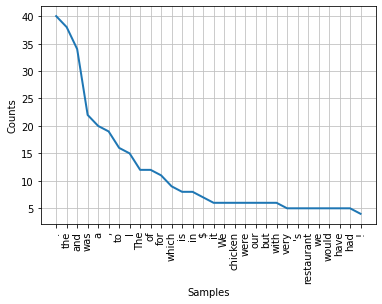

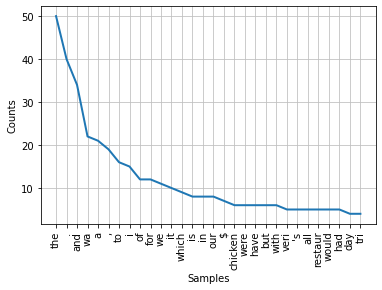

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [39]:
#Tokenization and Stemming
#word distribution before stemming
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

ps=PorterStemmer()

tokens = word_tokenize(review_b1)
fd = nltk.FreqDist(tokens)
fd.plot(30,cumulative=False)

#word distribution after stemming
def stemString(review):
    token_words=word_tokenize(review)
    token_words
    stem_string=[]
    for word in token_words:
        stem_string.append(ps.stem(word))
        stem_string.append(" ")
    return "".join(stem_string)

review_stem=stemString(review_b1)
tokens_stem = word_tokenize(review_stem)
fd = nltk.FreqDist(tokens_stem)
fd.plot(30,cumulative=False)